# Explore

### Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

### Data Imports

In [51]:
df_track = pd.read_csv('data_clean/track.csv')
df_album = pd.read_csv('data_clean/album.csv')
df_artist = pd.read_csv('data_clean/artist.csv')
df_rating = pd.read_csv('data_clean/rating.csv')
df_similar = pd.read_csv('data_clean/track_similarity.csv')

### Functions Definitions

In [52]:
def get_artist_id(artist_name):
    return df_artist[df_artist['name'] == artist_name]['artist_id'].values[0]

def get_album_id(album_name):
    return df_album[df_album['name'] == album_name]['album_id'].values[0]

def get_track_id(track_name):
    return df_track[df_track['name'] == track_name]['track_id'].values[0]

# ====================================================

def get_all_tracks_by_artist(artist_id, only_id=False):
    return df_track[df_track['artist_id'] == artist_id] if not only_id else df_track[df_track['artist_id'] == artist_id]['track_id']

def get_all_tracks_by_album(album_id, only_id=False):
    return df_track[df_track['album_id'] == album_id] if not only_id else df_track[df_track['album_id'] == album_id]['track_id']

def get_all_albums_by_artist(artist_id, only_id=False):
    return df_album[df_album['artist_id'] == artist_id] if not only_id else df_album[df_album['artist_id'] == artist_id]['album_id']

# ====================================================

def convert_track_id_to_name(track_id):
    return df_track[df_track['track_id'] == track_id]['title'].values[0]

def convert_album_id_to_name(album_id):
    return df_album[df_album['album_id'] == album_id]['name'].values[0]

def convert_artist_id_to_name(artist_id):
    return df_artist[df_artist['artist_id'] == artist_id]['name'].values[0]

# ====================================================

def compare_track_lists_sim(track_id_list_1, track_id_list_2):

    ret_list = []

    for main_track_id in track_id_list_1:
        for other_track_id in track_id_list_2:    
            
            similarity = df_similar[(df_similar['track_id_1'] == main_track_id) & (df_similar['track_id_2'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

            similarity = df_similar[(df_similar['track_id_2'] == main_track_id) & (df_similar['track_id_1'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

    ret = sorted(ret_list, key=lambda x: x[2], reverse=True)
    return ret

### Exploration

In [53]:
# number of different artists
artist_count = len(df_artist)
print("Number of different artists:", artist_count) 

# number of different albums
album_count = len(df_album)
print("Number of different albums:", album_count)

# number of different tracks
track_count = len(df_track)
print("Number of different tracks:", track_count)

# mean number of tracks per album
mean_tracks_per_album = round(track_count / album_count, 1)
print("\nMean number of tracks per album:", mean_tracks_per_album)

# mean number of albums per artist
mean_albums_per_artist = round(album_count / artist_count, 1)   
print("Mean number of albums per artist:", mean_albums_per_artist)

# mean number of tracks per artist
mean_tracks_per_artist = round(track_count / artist_count, 1)
print("Mean number of tracks per artist:", mean_tracks_per_artist)

Number of different artists: 2557
Number of different albums: 1843
Number of different tracks: 23385

Mean number of tracks per album: 12.7
Mean number of albums per artist: 0.7
Mean number of tracks per artist: 9.1


In [54]:
taylor_swift_id = get_artist_id('Taylor Swift')
tracks_by_taylor_swift_ids = get_all_tracks_by_artist(taylor_swift_id)
albums_by_taylor_swift_ids = get_all_albums_by_artist(taylor_swift_id)

print('Taylor Swift ID:', taylor_swift_id)
print('Taylor Swift Tracks:', [convert_track_id_to_name(track_id) for track_id in tracks_by_taylor_swift_ids['track_id'].values])
print('Taylor Swift Albums:', [convert_album_id_to_name(album_id) for album_id in albums_by_taylor_swift_ids['album_id'].values])


Taylor Swift ID: 2
Taylor Swift Tracks: ['Blank Space', 'Shake It Off', 'Style', 'Bad Blood', 'Welcome To New York', 'Wildest Dreams', 'Out Of The Woods', 'Red', 'Sweeter Than Fiction', '22', 'I Knew You Were Trouble.', 'Begin Again', 'We Are Never Ever Getting Back Together', 'The Moment I Knew', 'I Almost Do', 'All Too Well', 'Stay Stay Stay', 'State Of Grace', 'Ronan', 'Eyes Open', 'Ours', 'Sparks Fly', 'If This Was A Movie', 'Superman', 'Haunted', 'Mean', 'The Story Of Us', 'Back To December', 'Mine', 'Innocent', 'Dear John', 'Better Than Revenge', 'Last Kiss', 'Enchanted', 'Never Grow Up', 'Long Live', 'Speak Now', 'Today Was A Fairytale', 'Fearless', 'You Belong With Me', 'Breathless', 'Fifteen', 'Jump Then Fall', 'Untouchable', 'The Other Side Of The Door', 'Forever & Always', 'Superstar', 'Come In With The Rain', 'Love Story', 'Crazier', 'White Horse', "You're Not Sorry", 'The Way I Loved You', 'Breathe', 'Hey Stephen', "Should've Said No", 'Change', 'Picture To Burn', 'Our Son

Top 20 artists by number of tracks:
      artist_id  track_count            artist_name
407         408          358              Glee Cast
358         359          130             Kanye West
342         343          130          Justin Bieber
2322       2323          126         The Beach Boys
2331       2332          126         Cloud Nothings
657         658          124                   T.I.
2191       2192          120            The Beatles
150         151          114               Coldplay
2101       2102          112           Beastie Boys
1187       1188          111                 Weezer
186         187          109          Calvin Harris
2491       2492          109             Aphex Twin
226         227          107          George Strait
1683       1684          100        Nine Inch Nails
1633       1634          100  The Smashing Pumpkins
122         123          100                  Drake
370         371           96                Rihanna
51           52           96

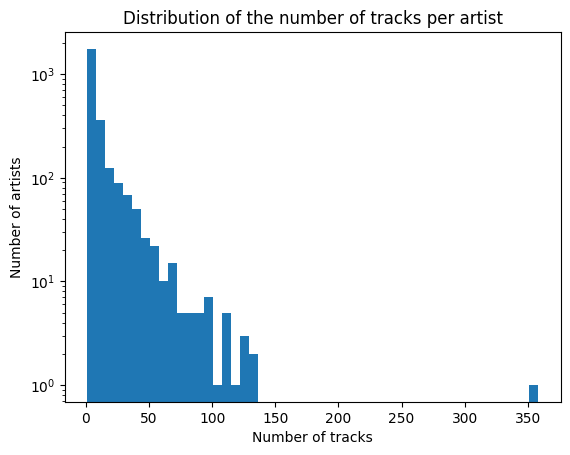

In [55]:
# print the 20 artists with the most tracks
artist_track_count = df_track.groupby('artist_id').size().reset_index(name='track_count')
artist_track_count = artist_track_count.sort_values(by='track_count', ascending=False)

# make a distribution of the number of tracks per artist
plt.hist(artist_track_count['track_count'], bins=50)
plt.xlabel('Number of tracks')
plt.ylabel('Number of artists')
plt.yscale('log')
plt.title('Distribution of the number of tracks per artist')

artist_track_count = artist_track_count.head(20)
artist_track_count['artist_name'] = artist_track_count['artist_id'].apply(convert_artist_id_to_name)
print("Top 20 artists by number of tracks:\n" + str(artist_track_count))

Top 20 albums by number of tracks:
      album_id  track_count                                       album_name
446      448.0          130         Glee: The Music, The Complete Season Two
1504    1506.0          115  Good Vibrations: Thirty Years of The Beach Boys
1520    1522.0          112                              BIRP! February 2012
270      272.0          106        Glee: The Music, The Complete Season Four
1785    1787.0           95                Bleep: The Top 100 Tracks of 2014
175      177.0           87            Musikvideos Jahrescharts 2013 Top 100
1054    1056.0           85                          Disney Classics Box Set
312      314.0           82                                 100x Liefde 2014
599      601.0           62                                    Årsbeste 2009
177      179.0           61                        The Disco Boys, Volume 14
291      293.0           58                          The Video Year Mix 2012
1839    1841.0           54              

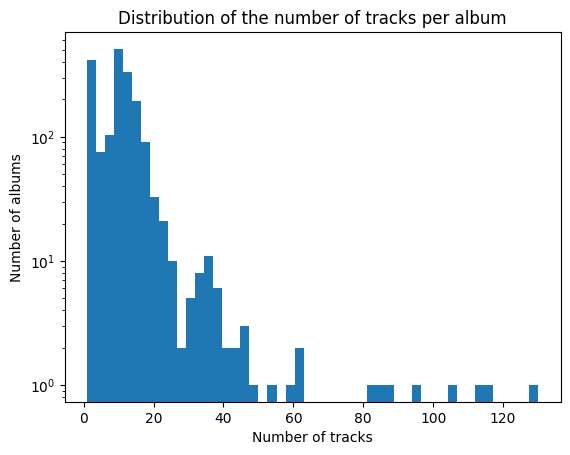

In [56]:
# number of tracks per album
album_track_count = df_track.groupby('album_id').size().reset_index(name='track_count')
album_track_count = album_track_count.sort_values(by='track_count', ascending=False)

# make a distribution of the number of tracks per album
plt.hist(album_track_count['track_count'], bins=50)
plt.xlabel('Number of tracks')
plt.ylabel('Number of albums')
plt.yscale('log')
plt.title('Distribution of the number of tracks per album')

album_track_count = album_track_count.head(20)
album_track_count['album_name'] = album_track_count['album_id'].apply(convert_album_id_to_name)
print("Top 20 albums by number of tracks:\n" + str(album_track_count))


In [57]:
# Compare all artist_id 1 tracks with all artist_id 2 tracks using track_similarity

artist_1 = 'Taylor Swift'
artist_2 = 'Calvin Harris'

tracks_by_taylor_swift_ids = get_all_tracks_by_artist(get_artist_id(artist_1), True).to_list()
other_artist_tracks_ids = get_all_tracks_by_artist(get_artist_id(artist_2), True).to_list()

print(f'Tracks by {artist_1}: {len(tracks_by_taylor_swift_ids)}')
print(f'Tracks by {artist_2}: {len(other_artist_tracks_ids)}\n')

# Get the similarity between all tracks by taylor swift and all tracks by the other artist
result = compare_track_lists_sim(tracks_by_taylor_swift_ids, other_artist_tracks_ids) 
for r in result:
    print(r)

if len(result) == 0:
    print('No similarities found between the tracks of the two artists')

Tracks by Taylor Swift: 95
Tracks by Calvin Harris: 109

('Shake It Off', 'Blame', 0.0833516)
('Style', 'Faith', 0.00607397)


In [58]:
# print all track ids that do not have a similarity value
temp_list = []
track_ids = df_track['track_id'].to_list()
for track_id in track_ids:
    if df_similar[(df_similar['track_id_1'] == track_id) | (df_similar['track_id_2'] == track_id)].empty:
        temp_list.append(track_id)

print('Track ids without similarity value:', f"{temp_list[:10]} ..." if len(temp_list) > 10 else temp_list)
print('Number of track ids without similarity value:', len(temp_list))
print('Percentage of track ids without similarity value:', round(len(temp_list) / track_count * 100, 2), '%')

Track ids without similarity value: [1, 12, 14, 16, 19, 23, 31, 32, 33, 35] ...
Number of track ids without similarity value: 16174
Percentage of track ids without similarity value: 69.16 %
